Here we investigate the data we have collected, to see if it's even possible to learn anything meaningful from it, and which features I should consider.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

First, we load the matrix

In [40]:
MATRIX_PATH = "./matrix_updated.npy"
matrix = np.load(MATRIX_PATH)
matrix

array([[-1.700e+02,  8.000e+00,  1.000e+04, ...,  3.400e+01,  6.400e+01,
         1.000e+00],
       [-6.780e+02,  1.000e+01,  1.000e+04, ...,  1.010e+02,  4.200e+01,
         1.000e+00],
       [-1.000e+00,  1.100e+01,  1.000e+04, ...,  4.600e+01,  4.000e+01,
         1.000e+00],
       ...,
       [ 1.437e+03,  1.000e+00,  1.431e+03, ...,  5.300e+01,  1.010e+02,
         1.000e+00],
       [ 0.000e+00,  4.000e+00,  9.830e+02, ...,  1.050e+02,  8.400e+01,
         1.000e+00],
       [ 0.000e+00,  0.000e+00,  1.846e+03, ...,  9.000e+01,  2.900e+01,
         1.000e+00]])

Now, we want to see if features have relationships between them
recall each column in the matrix above is defined in the following order:
```delta_pb, delta_max_win, delta_rank, delta_gt, blue_cards (8), red_cards (8), won?```

I should explain that these are in terms of player 1, and each of them have the following meaning:
- delta_pb: the difference between the best trophies of the two players
- delta_max_win: the difference between the max challenge wins they have gotten
- delta_rank: the difference between the best rank achieved, note that I have multiplied by a factor of -1
- delta_gt: the difference between the number of top 1000 finishes in a global tournament
- blue_cards: deck used by player 1
- red_cards: deck used by player 2
- won: did player 1 win? 1 if yes 0 otherwise

In [41]:
num_data = matrix.shape[0]
num_data

1206

Now I want to see if the rank achieved tells us something meaningful, I'm storing the data as a dictionary, mapping delta_rank // 1000 to a list where the first index tells you the number of wins achieved by player 1 with the given delta_rank, and the second index as the total number of data points.

In [54]:
delta_rank_plot = {}
# using rank // 1000 to hash into the same slot
for i in range(num_data):
    if matrix[i][2] // 1000 not in delta_rank_plot:
        delta_rank_plot[matrix[i][2] // 1000] = [matrix[i][-1], 1]    # win rate and count
    else:

        curr = delta_rank_plot[matrix[i][2] // 1000]
        delta_rank_plot[matrix[i][2] // 1000] = [(curr[0] + matrix[i][-1]), curr[1] + 1]

delta_rank_plot

{10.0: [397.0, 492],
 3.0: [31.0, 42],
 0.0: [205.0, 351],
 -1.0: [41.0, 104],
 9.0: [4.0, 6],
 4.0: [10.0, 16],
 6.0: [3.0, 8],
 8.0: [12.0, 17],
 1.0: [49.0, 83],
 5.0: [21.0, 27],
 2.0: [31.0, 43],
 7.0: [13.0, 16],
 -10.0: [1.0, 1]}

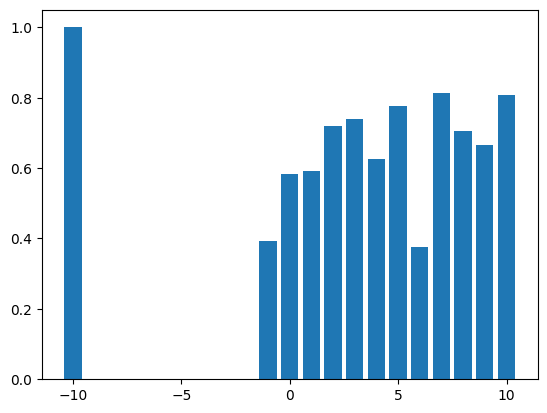

In [43]:
x_val = list(delta_rank_plot.keys())
y_val = [x[0] / x[1] for x in delta_rank_plot.values()]
count = [x[1] for x in delta_rank_plot.values()]
plt.bar(x_val, y_val)
plt.show()

As seen above, you cant really tell much unless we consider the number of data points with the graph below.

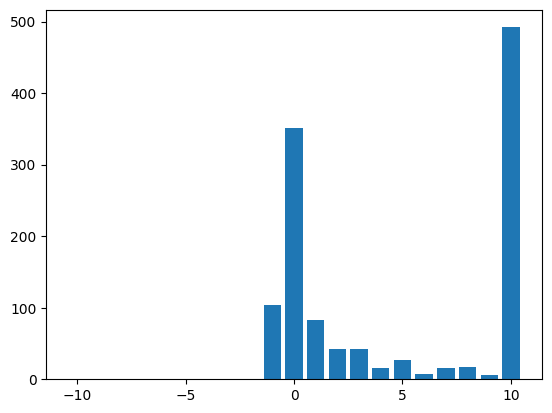

In [44]:
plt.bar(x_val, count)
plt.show()

With this plot, having a -10 * 1000 rank difference definitely doesn't mean you will beat a player 10000 + ranks above you, since it was based on 1 data point. However, it is safe to say that you will have around 50% of beating a player within 1000 ranks of you, and around 80% beating a player 10000 + ranks of you. Let's investigate if delta_gt has something meaningful to tell.

In [57]:
delta_gt_plot = {}
for i in range(num_data):
    if matrix[i][3] not in delta_gt_plot:
        delta_gt_plot[matrix[i][3]] = [matrix[i][-1], 1]    # win rate and count
    else:

        curr = delta_gt_plot[matrix[i][3]]
        delta_gt_plot[matrix[i][3]] = [(curr[0] + matrix[i][-1]), curr[1] + 1]

delta_gt_plot


{9.0: [83.0, 107],
 10.0: [278.0, 324],
 0.0: [82.0, 154],
 -1.0: [8.0, 18],
 -6.0: [4.0, 10],
 -4.0: [9.0, 24],
 -2.0: [10.0, 23],
 6.0: [25.0, 41],
 4.0: [51.0, 77],
 8.0: [53.0, 78],
 2.0: [40.0, 53],
 5.0: [37.0, 78],
 7.0: [29.0, 49],
 3.0: [64.0, 95],
 1.0: [31.0, 47],
 -3.0: [11.0, 22],
 -5.0: [3.0, 5],
 -7.0: [0.0, 1]}

18 18


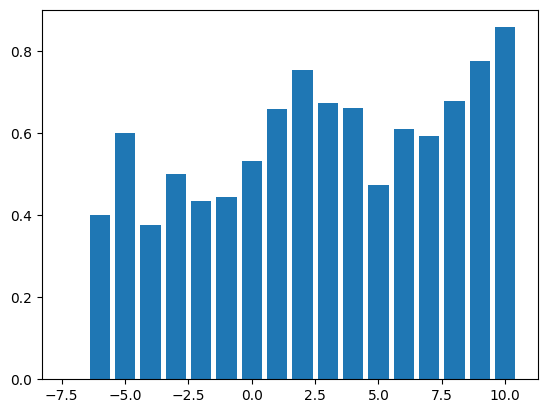

In [52]:
x_val = list(delta_gt_plot.keys())
y_val = [x[0] / x[1] for x in delta_gt_plot.values()]
print(len(x_val), len(y_val))
count = [x[1] for x in delta_gt_plot.values()]
plt.bar(x_val, y_val)
plt.show()

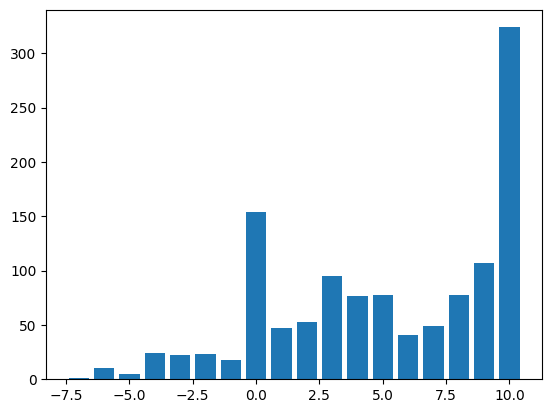

In [53]:
plt.bar(x_val, count)
plt.show()

So it seems like when the difference is 0, we have close to 50% win rate, and when the difference is significant (10), we have more than 80% win rate.
Even with limited data other than these two values, we can still conclude having a higher difference definitely helps. Another feature I'm interested to see, and expect to make quite a bit of difference is the max win in a challenge.

In [56]:
delta_challenge_plot = {}
for i in range(num_data):
    if matrix[i][1] not in delta_gt_plot:
        delta_challenge_plot[matrix[i][1]] = [matrix[i][-1], 1]    # win rate and count
    else:

        curr = delta_gt_plot[matrix[i][1]]
        delta_challenge_plot[matrix[i][1]] = [(curr[0] + matrix[i][-1]), curr[1] + 1]

delta_challenge_plot

{10.0: [397.0, 492],
 3.0: [31.0, 42],
 0.0: [205.0, 351],
 -1.0: [41.0, 104],
 9.0: [4.0, 6],
 4.0: [10.0, 16],
 6.0: [3.0, 8],
 8.0: [12.0, 17],
 1.0: [49.0, 83],
 5.0: [21.0, 27],
 2.0: [31.0, 43],
 7.0: [13.0, 16],
 -10.0: [1.0, 1]}

29 29


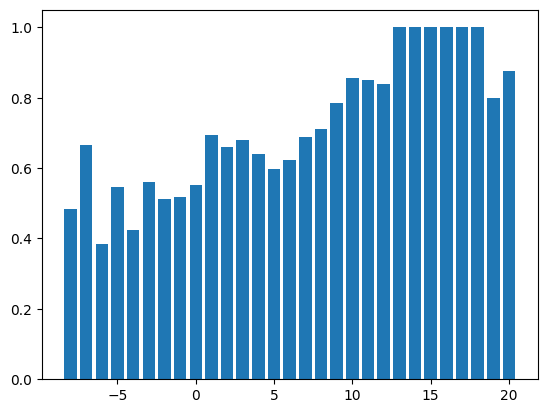

In [58]:
x_val = list(delta_challenge_plot.keys())
y_val = [x[0] / x[1] for x in delta_challenge_plot.values()]
print(len(x_val), len(y_val))
count = [x[1] for x in delta_challenge_plot.values()]
plt.bar(x_val, y_val)
plt.show()

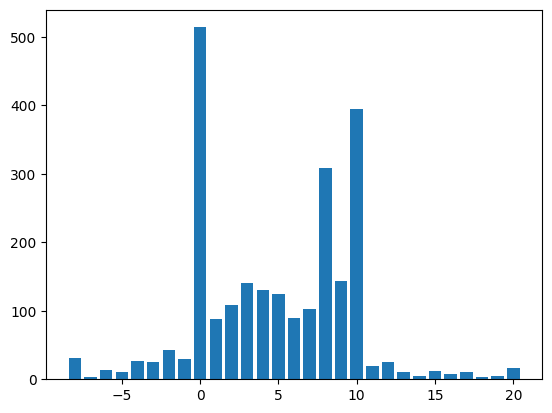

In [59]:
plt.bar(x_val, count)
plt.show()

In [61]:
print(delta_challenge_plot[0], delta_challenge_plot[0][0] / delta_challenge_plot[0][1])
print(delta_challenge_plot[10], delta_challenge_plot[10][0] / delta_challenge_plot[10][1])

[284.0, 514] 0.5525291828793775
[337.0, 394] 0.8553299492385786


Before I do any meaningful analysis, note that the max win of a challenge is 20. So extreme values of -20 and + 20 are very rare. Since the data I'm using comes from Pro players, its normal to see a delta of 0 a lot. But even with the limited data, a difference of 10 + will always usually yield an 80% win, and you can see near 0, the win rate is just a bit more than 50%.